<a href="https://colab.research.google.com/github/nori0724/LINEbot/blob/master/LTV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://ohke.hateblo.jp/entry/2019/03/02/230000

In [1]:
! pip install lifetimes

     |████████████████████████████████| 583kB 2.8MB/s 



# データの加工

In [3]:
import pandas as pd
import urllib.request

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
path = './OnlineRetail.xlsx'

# xlsxのダウンロード
urllib.request.urlretrieve(url, path)

# DataFrameにロード
df_row = pd.read_excel(path)
df_row.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
len(df_row)

541909

In [5]:
print(df_row.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [0]:
#合計金額を計算
df_row['SubTotalPrice'] = df_row['Quantity'] * df_row['UnitPrice']


In [7]:
df_row.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SubTotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
# キャンセル分は、削除
df = df_row.loc[df_row['SubTotalPrice'] > 0.0]

print(len(df))

df.head()

530104


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SubTotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
# キャンセル分を表示
df_cancel = df_row.loc[-(df_row['SubTotalPrice'] > 0.0)]
print(len(df_cancel))

df_cancel.head()



11805


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SubTotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


In [10]:
len(df)

530104

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID,SubTotalPrice
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [12]:
df.sort_values('Quantity',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SubTotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom,960.00
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.40


In [13]:
df.sort_values('UnitPrice',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SubTotalPrice
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.330,NaN,United Kingdom,13541.330
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.060,NaN,United Kingdom,11062.060
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.750,16029.0,United Kingdom,8142.750
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.170,NaN,United Kingdom,4505.170
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.630,NaN,United Kingdom,4287.630
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536.0,France,4161.060
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536.0,France,4161.060
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744.0,Singapore,3949.320
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502.0,United Kingdom,3155.950
347948,567353,M,Manual,1,2011-09-19 16:14:00,2653.950,NaN,Hong Kong,2653.950


In [14]:
#df.isnull().any(axis=0)
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       132220
Country               0
SubTotalPrice         0
dtype: int64

(array([5.30102e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.00000e+00, 8.10040e+03, 1.61998e+04, 2.42992e+04, 3.23986e+04,
        4.04980e+04, 4.85974e+04, 5.66968e+04, 6.47962e+04, 7.28956e+04,
        8.09950e+04]),
 <a list of 10 Patch objects>)

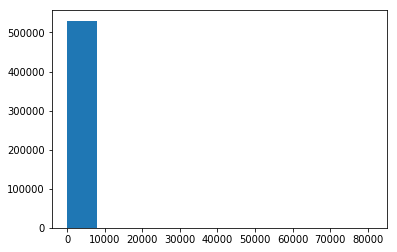

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df["Quantity"])

In [0]:
# 顧客ID, 購入日時, 金額 のレコードを生成
transaction_df = df.groupby(['CustomerID', 'InvoiceDate'])['SubTotalPrice'].sum().reset_index()

In [17]:
#transaction_df.sort_values('CustomerID',ascending=False)
transaction_df

,CustomerID,InvoiceDate,SubTotalPrice
0,12346.0,2011-01-18 10:01:00,77183.60
1,12347.0,2010-12-07 14:57:00,711.79
2,12347.0,2011-01-26 14:30:00,475.39
3,12347.0,2011-04-07 10:43:00,636.25
4,12347.0,2011-06-09 13:01:00,382.52
5,12347.0,2011-08-02 08:48:00,584.91
6,12347.0,2011-10-31 12:25:00,1294.32
7,12347.0,2011-12-07 15:52:00,224.82
8,12348.0,2010-12-16 19:09:00,892.80
9,12348.0,2011-01-25 10:42:00,227.44


# RFM分析/KMeans

In [19]:
# transaction_dfから、frequency, recency, Tを抽出
from lifetimes.utils import summary_data_from_transaction_data
summary_df = summary_data_from_transaction_data(transaction_df, 'CustomerID', 'InvoiceDate', observation_period_end='2011-11-9')
summary_df



,frequency,recency,T
CustomerID,,,
12346.0,0.0,0.0,295.0
12347.0,5.0,328.0,337.0
12348.0,3.0,283.0,328.0
12350.0,0.0,0.0,280.0
12352.0,6.0,260.0,266.0
12353.0,0.0,0.0,174.0
12354.0,0.0,0.0,202.0
12355.0,0.0,0.0,184.0
12356.0,1.0,80.0,295.0


In [20]:
summary_df.describe()

,frequency,recency,T
count,4086.000000,4086.000000,4086.000000
mean,2.510524,113.494126,205.520558
std,5.320408,119.945432,109.407978
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,113.000000
50%,1.000000,73.000000,230.000000
75%,3.000000,223.000000,301.000000
max,109.000000,343.000000,343.000000


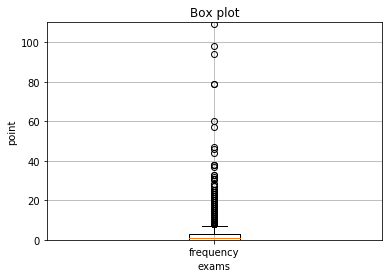

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

# 点数のタプル
points = (summary_df["frequency"])

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels(["frequency"])

plt.title('Box plot')
plt.xlabel('exams')
plt.ylabel('point')
# Y軸のメモリのrange
plt.ylim([0,110])
plt.grid()
#
# 描画
plt.show()

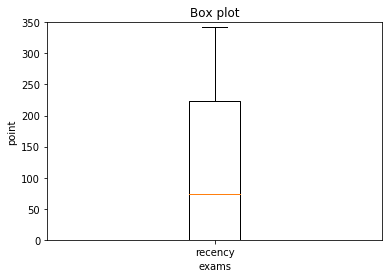

In [65]:
# 点数のタプル
points = (summary_df["recency"])

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels([ "recency"])

plt.title('Box plot')
plt.xlabel('exams')
plt.ylabel('point')
# Y軸のメモリのrange
plt.ylim([0,350])
#plt.grid()

# 描画
plt.show()

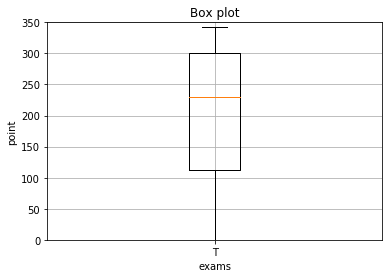

In [66]:
# 点数のタプル
points = ( summary_df["T"])

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels([ "T"])

plt.title('Box plot')
plt.xlabel('exams')
plt.ylabel('point')
# Y軸のメモリのrange
plt.ylim([0,350])
plt.grid()

# 描画
plt.show()

(array([3.905e+03, 1.420e+02, 2.300e+01, 6.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([  0. ,  10.9,  21.8,  32.7,  43.6,  54.5,  65.4,  76.3,  87.2,
         98.1, 109. ]),
 <a list of 10 Patch objects>)

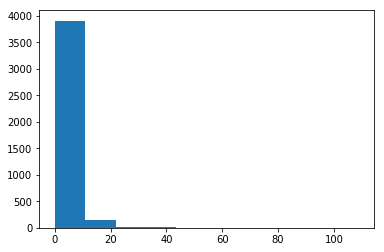

In [21]:
plt.hist(summary_df["frequency"])


In [23]:
summary_array = np.array([summary_df["frequency"], summary_df["recency"], summary_df["T"]], np.int32)

print(summary_array)


[[  0   5   3 ...   0   9   2]
 [  0 328 283 ...   0 294 159]
 [295 337 328 ...  96 307 171]]


In [24]:
# 行列を転置
summary_array = summary_array.T
summary_array

array([[  0,   0, 295],
       [  5, 328, 337],
       [  3, 283, 328],
       ...,
       [  0,   0,  96],
       [  9, 294, 307],
       [  2, 159, 171]], dtype=int32)

In [25]:
from sklearn.cluster import KMeans
# クラスタ分析を実行 (クラスタ数=4)
pred = KMeans(n_clusters=3).fit_predict(summary_array)
print(pred)

[0 2 2 ... 1 2 0]


In [0]:
summary_df['cluster_id']=pred

In [0]:
print(summary_df)

            frequency  recency      T  cluster_id
CustomerID                                       
12346.0           0.0      0.0  295.0           2
12347.0           5.0    328.0  337.0           1
12348.0           3.0    283.0  328.0           1
12350.0           0.0      0.0  280.0           2
12352.0           6.0    260.0  266.0           1
12353.0           0.0      0.0  174.0           2
12354.0           0.0      0.0  202.0           2
12355.0           0.0      0.0  184.0           2
12356.0           1.0     80.0  295.0           2
12357.0           0.0      0.0    3.0           0
12358.0           0.0      0.0  120.0           0
12359.0           3.0    274.0  301.0           1
12360.0           2.0    148.0  170.0           2
12361.0           0.0      0.0  257.0           2
12362.0           8.0    260.0  265.0           1
12363.0           1.0    133.0  212.0           2
12364.0           2.0     72.0   82.0           0
12365.0           0.0      0.0  261.0           2


In [0]:
summary_df.sort_values('frequency',ascending=False)

# RFM②
方針・・・列ごとでクラスタリング、3段階評価をつける

In [0]:
f_array = np.array([summary_df["frequency"]], np.int32)
r_array = np.array([summary_df["recency"]], np.int32)
t_array = np.array([summary_df["T"]], np.int32)



In [0]:
# 行列を転置
f_array = f_array.T
r_array = r_array.T
t_array = t_array.T

In [0]:
from sklearn.cluster import KMeans
# クラスタ分析を実行 (クラスタ数=4)
f_pred = KMeans(n_clusters=3).fit_predict(f_array)
r_pred = KMeans(n_clusters=3).fit_predict(r_array)
t_pred = KMeans(n_clusters=3).fit_predict(t_array)


In [58]:
rfm = pd.DataFrame({'f_pred' : f_pred, 'r_pred' : r_pred, 't_pred':t_pred})

print(rfm)
rfm.describe()

      f_pred  r_pred  t_pred
0          0       2       1
1          0       1       1
2          0       1       1
3          0       2       1
4          0       1       1
5          0       2       0
6          0       2       0
7          0       2       0
8          0       2       1
9          0       2       2
10         0       2       2
11         0       1       1
12         0       0       0
13         0       2       1
14         1       1       1
15         0       0       0
16         0       2       2
17         0       2       1
18         0       1       1
19         0       2       2
20         0       1       1
21         0       2       1
22         0       2       2
23         0       2       1
24         0       2       2
25         0       0       0
26         0       0       0
27         0       0       2
28         0       0       1
29         0       2       2
...      ...     ...     ...
4056       1       0       0
4057       0       0       0
4058       0  

,f_pred,r_pred,t_pred
count,4086.000000,4086.000000,4086.000000
mean,0.097895,1.278023,0.941997
std,0.305335,0.816322,0.770835
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,2.000000,1.000000
75%,0.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


In [60]:
print(pd.crosstab(rfm['f_pred'], rfm["f_pred"]))
print(pd.crosstab(rfm['r_pred'], rfm["r_pred"]))
print(pd.crosstab(rfm['t_pred'], rfm["t_pred"]))

f_pred     0    1   2
f_pred               
0       3696    0   0
1          0  380   0
2          0    0  10
r_pred    0     1     2
r_pred                 
0       951     0     0
1         0  1048     0
2         0     0  2087
t_pred     0     1     2
t_pred                  
0       1339     0     0
1          0  1645     0
2          0     0  1102


# 学習

In [0]:
# BG/NBDモデルを学習する
from lifetimes import BetaGeoFitter

bgf_model = BetaGeoFitter(penalizer_coef=0.0)

bgf_model.fit(summary_df['frequency'], summary_df['recency'], summary_df['T'])
# <lifetimes.BetaGeoFitter: fitted with 4297 subjects, a: 0.00, alpha: 70.93, b: 3.13, r: 0.83>

<lifetimes.BetaGeoFitter: fitted with 4086 subjects, a: 0.00, alpha: 71.84, b: 11591.91, r: 0.81>

In [0]:
bgf_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,8.066597e-01,2.797166e-02,7.518352e-01,8.614841e-01
alpha,7.184278e+01,2.861890e+00,6.623347e+01,7.745208e+01
a,6.023542e-07,3.312805e-03,-6.492495e-03,6.493699e-03
b,1.159191e+04,3.039475e+07,-5.956213e+07,5.958531e+07


In [0]:
summary_df["T"]

CustomerID
12346.0    316.0
12347.0    358.0
12348.0    349.0
12349.0      9.0
12350.0    301.0
12352.0    287.0
12353.0    195.0
12354.0    223.0
12355.0    205.0
12356.0    316.0
12357.0     24.0
12358.0    141.0
12359.0    322.0
12360.0    191.0
12361.0    278.0
12362.0    286.0
12363.0    233.0
12364.0    103.0
12365.0    282.0
12370.0    351.0
12371.0     50.0
12372.0    287.0
12373.0    302.0
12374.0     16.0
12375.0     89.0
12377.0    345.0
12378.0    120.0
12379.0    161.0
12380.0    176.0
12381.0    110.0
           ...  
18242.0    204.0
18245.0    346.0
18246.0    224.0
18248.0    177.0
18249.0      8.0
18250.0    301.0
18251.0     78.0
18252.0    162.0
18255.0     80.0
18257.0    287.0
18259.0    357.0
18260.0    349.0
18261.0     86.0
18262.0    131.0
18263.0    243.0
18265.0    149.0
18268.0    125.0
18269.0    357.0
18270.0    257.0
18272.0    237.0
18273.0    248.0
18274.0     21.0
18276.0     34.0
18277.0     49.0
18278.0     64.0
18280.0    268.0
18281.0    171.0
182

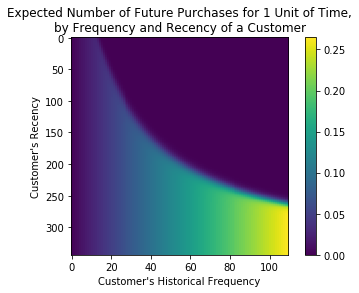

In [0]:
#1日後の購入数はplot_frequency_recency_matrixメソッドで可視化できます。


from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf_model)

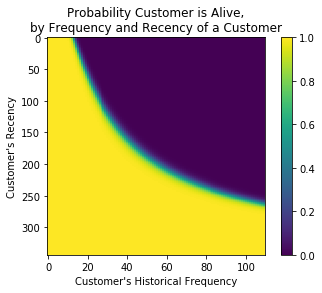

In [0]:
#生存確率はplot_probability_alive_matrixです。recencyが小さいほど・frequencyが大きいほど、確率が高く計算されることがわかります。

from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf_model)

In [0]:
#このモデルを使って予測していきます。BetaGeoFilterのconditional_expected_number_of_purchases_up_to_timeメソッドで、未来の期間t (日) でのトランザクション数を予測できます。
# 未来の29日間 (2011-11-10〜2011-12-09) のトランザクション数を顧客ごとに予測

t = 29
summary_df['predicted_purchases'] = bgf_model.conditional_expected_number_of_purchases_up_to_time(t, summary_df['frequency'], summary_df['recency'], summary_df['T'])

# 予測トランザクション数が多いトップ10
summary_df.sort_values(by='predicted_purchases').tail(10)


,frequency,recency,T,predicted_purchases
CustomerID,,,,
16422.0,44.0,338.0,339.0,3.162750
13798.0,46.0,342.0,342.0,3.279973
14527.0,47.0,337.0,339.0,3.374510
13089.0,57.0,338.0,339.0,4.080376
12971.0,60.0,342.0,342.0,4.261022
14606.0,79.0,341.0,343.0,5.578964
15311.0,79.0,343.0,343.0,5.578964
12748.0,94.0,342.0,343.0,6.627555
17841.0,98.0,343.0,343.0,6.907179


In [0]:
# 実際のトランザクション数TOP5を表示
transaction_df.loc[(transaction_df['InvoiceDate'] >= '2011-11-10') &(transaction_df['InvoiceDate'] < '2011-12-09')].groupby('CustomerID').count().sort_values(by='InvoiceDate', ascending=False)['InvoiceDate']

CustomerID
12748.0    45
14911.0    37
17841.0    14
14646.0    12
12971.0    10
12569.0     9
14606.0     9
13089.0     9
15311.0     9
13199.0     9
17450.0     9
13599.0     8
13408.0     7
17243.0     7
15187.0     6
18139.0     6
15189.0     6
12471.0     6
17757.0     6
14735.0     6
17811.0     6
13798.0     6
15856.0     6
17949.0     6
12682.0     6
14527.0     6
14547.0     6
13098.0     6
16133.0     5
15838.0     5
           ..
14572.0     1
14621.0     1
14569.0     1
14553.0     1
14551.0     1
14550.0     1
14546.0     1
14544.0     1
14543.0     1
14601.0     1
14626.0     1
14709.0     1
14664.0     1
14708.0     1
14703.0     1
14696.0     1
14684.0     1
14680.0     1
14675.0     1
14666.0     1
14662.0     1
14629.0     1
14661.0     1
14659.0     1
14658.0     1
14657.0     1
14649.0     1
14641.0     1
14640.0     1
15203.0     1
Name: InvoiceDate, Length: 1619, dtype: int64

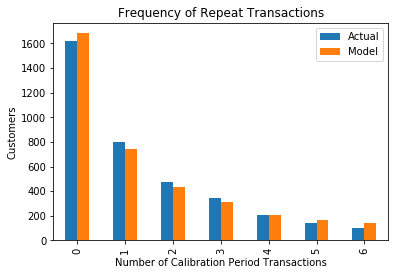

In [0]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf_model)

In [0]:
####################################

In [0]:


from lifetimes.datasets import load_cdnow_summary
data = load_cdnow_summary(index_col=[0])

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.242593,0.012557,0.217981,0.267205
alpha,4.413532,0.378221,3.672218,5.154846
a,0.792886,0.185719,0.428877,1.156895
b,2.425752,0.705345,1.043276,3.808229


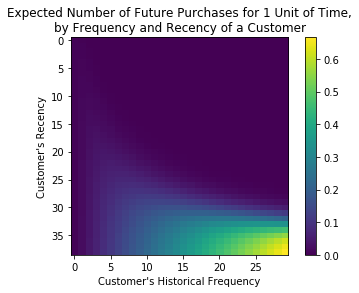

In [0]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

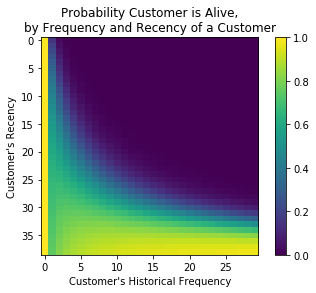

In [0]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [0]:
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])


# 予測トランザクション数が多いトップ5
data.sort_values(by='predicted_purchases').tail(10)

,frequency,recency,T,predicted_purchases
ID,,,,
1017,12,32.43,33.43,0.296308
693,13,34.43,35.00,0.312249
813,13,33.86,34.29,0.318802
1413,14,30.29,31.57,0.360929
1539,14,29.86,30.86,0.371088
509,18,35.14,35.86,0.424877
841,19,34.00,34.14,0.474738
1981,17,28.43,28.86,0.486526
157,29,37.71,38.00,0.662396


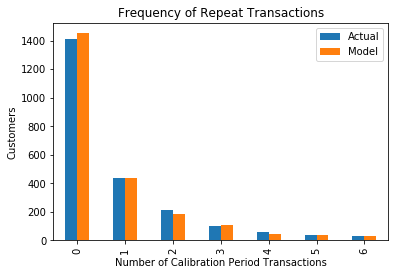

In [0]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)